In [1]:
# pip install tensorflow

In [2]:
import pickle as cPickle
import gzip, numpy
# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f, encoding='iso-8859-1')
f.close()
#above I used the given code block modified for python3

In [3]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.callbacks as CallB

In [4]:
#these objects contain the parameters' values for each sample in the sets from our data
#I used reshape so my data fits the model
Xtrn=train_set[0].reshape(-1,28,28,1)
Xvld=valid_set[0].reshape(-1,28,28,1)
Xtst=test_set[0].reshape(-1,28,28,1)

#these objects contain the targets' values for each sample in the sets from our data
#I use to_categorical for one-hot encode target column
Ytrn, Yvld, Ytst = to_categorical(train_set[1]), to_categorical(valid_set[1]), to_categorical(test_set[1])

In [5]:
#here I create my model
model = Sequential()

#here I add my model's layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(9, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#here I compile my model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["categorical_accuracy"])

#the code below allows me to determine information given the model's weights at any epoch
my_callbacks = [
    CallB.EarlyStopping(patience=3),
    CallB.ModelCheckpoint(filepath='./cnnFolder/model.{epoch:02d}.h5'),
    CallB.TensorBoard(log_dir='./logs'),
]
#here I train my model multiple
metrics = model.fit(Xtrn, Ytrn, validation_data=(Xvld, Yvld), epochs=10, callbacks=my_callbacks, use_multiprocessing=True)

trnErrs = [1.0-x for x in metrics.history['categorical_accuracy']]
vldErrs = [1.0-x for x in metrics.history['val_categorical_accuracy']]

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3958 - categorical_accuracy: 0.8809 - val_loss: 0.0873 - val_categorical_accuracy: 0.9757
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0839 - categorical_accuracy: 0.9738 - val_loss: 0.0742 - val_categorical_accuracy: 0.9793
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0533 - categorical_accuracy: 0.9835 - val_loss: 0.0799 - val_categorical_accuracy: 0.9787
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0395 - categorical_accuracy: 0.9879 - val_loss: 0.0720 - val_categorical_accuracy: 0.9797
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0295 - categorical_accuracy: 0.9905 - val_loss: 0.0612 - val_categorical_accuracy: 0.9836
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0240 - categorical_accuracy: 0.9920 - val_loss: 0.0634 - val_categoric

In [6]:
#I store the test errors at each epoch here for later
tstErrs = []

def testacc(ypred,ytrue):
    #here I calculate the testing accuracy of my model
    acc = 0.0
    for a,b in zip(ypred,ytrue):
        if list(b).index(max(b)) == list(a).index(max(a)):
            acc+=1/len(ytrue)
    return acc

In [7]:
#here I set ypred as my label predictions for the images in the test set
testpred = list(model.predict(Xtst))
#here I set ytrue as the true labels for the images in test set
testtrue = list(Ytst)
for i in range(0,len(vldErrs)):
    model.load_weights('./cnnFolder/model.0%d.h5'%(i+1))
    #here I set ypred as my label predictions for the images in the test set
    testpred = list(model.predict(Xtst))
    #here I set ytrue as the true labels for the images in test set
    testtrue = list(Ytst)
    tstErrs.append(1.0-testacc(testtrue,testpred))
    continue

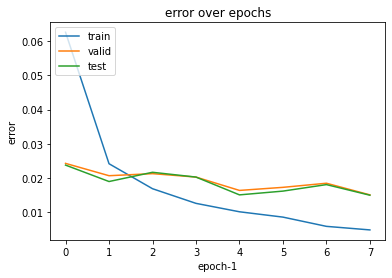

In [8]:
#here I plot the accuracies accross the epochs
plt.plot(trnErrs)
plt.plot(vldErrs)
plt.plot(tstErrs)
plt.title('error over epochs')
plt.ylabel('error')
plt.xlabel('epoch-1')
plt.legend(['train', 'valid', 'test'], loc='upper left')
plt.show()

In [10]:
print('highest and final validation scores')
print(1-min(vldErrs))
print(1-vldErrs[-1])
print('highest and final test scores')
print(1-min(tstErrs))
print(1-tstErrs[-1])

highest and final validation scores
0.9848999977111816
0.9848999977111816
highest and final test scores
0.9849999999999078
0.9849999999999078
